In [ ]:
import pandas as pd
from IPython.display import display, Markdown
df_all=pd.read_csv("C:/Users/Lightified/Desktop/New folder/yoruba_ground_truth_workflow/ground_truth.csv")  # Load ground truth dataset


In [1]:
import pandas as pd
FOLDERS = 'C:/Users/Lightified/Desktop/RAG/Rag/Obj 4'

In [2]:
# Cell 2: load all CSVs from the variant folders and sample-check columns
from pathlib import Path

rows = []

# Support either a mapping of variant -> path or a single base folder containing variant subfolders (or CSVs)
folders_map = {}
if isinstance(FOLDERS, dict):
    # FOLDERS already a mapping
    folders_map = {k: Path(v) for k, v in FOLDERS.items()}
else:
    base = Path(FOLDERS)
    if not base.exists():
        raise RuntimeError(f'FOLDERS path does not exist: {base}')
    # If there are subdirectories, treat each subdirectory name as a variant
    subdirs = sorted([p for p in base.iterdir() if p.is_dir()])
    if subdirs:
        for sub in subdirs:
            folders_map[sub.name] = sub
    else:
        # No subdirectories: treat the base folder itself as a single variant named after the folder
        folders_map[base.name] = base

for variant, path in folders_map.items():
    if not path.exists():
        print(f'Warning: {path} does not exist')
        continue
    for csvf in sorted(path.glob('*.csv')):
        try:
            df = pd.read_csv(csvf)
        except Exception as e:
            print(f'Failed to read {csvf}: {e}')
            continue
        df['variant'] = variant
        df['source_file'] = csvf.name
        rows.append(df)

if not rows:
    raise RuntimeError('No CSVs loaded — check directory paths and files.')

df_all = pd.concat(rows, ignore_index=True, sort=False)
print('Loaded rows:', len(df_all))
print('Variants found:', df_all['variant'].unique())
print('Models found (sample):', pd.unique(df_all['model'])[:20])
print('Columns:')
print(list(df_all.columns))

# show a small sample to verify types and values
display(df_all.head())

Loaded rows: 210
Variants found: ['advanced' 'modular' 'Naive']
Models found (sample): ['gemini' 'cohere' 'bigscience/bloomz-7b1'
 'mistralai/Mistral-7B-Instruct-v0.3' 'meta-llama/Llama-3.2-1B-Instruct'
 'Qwen/Qwen2.5-7B-Instruct' 'deepseek-ai/DeepSeek-R1-Distill-Qwen-7B']
Columns:
['model', 'domain', 'question', 'reference', 'generated_answer', 'context_relevance', 'faithfulness', 'answer_relevance', 'BLEU', 'ROUGE-L', 'BERTScore_F1', 'Cosine_Similarity', 'Composite_Gen', 'Composite_RAG_Score', 'variant', 'source_file', 'Unnamed: 0']


,model,domain,question,reference,generated_answer,context_relevance,faithfulness,answer_relevance,BLEU,ROUGE-L,BERTScore_F1,Cosine_Similarity,Composite_Gen,Composite_RAG_Score,variant,source_file,Unnamed: 0
0,gemini,culture,Báwo ni *Sapará* ṣe yàtọ̀ sí *Dàńṣíkí* àti àwọ...,"*Sapará* jẹ́ àṣọ tí ó dà bí *agbádá*, ṣùgbọ́n ...",Alaye lori bi Sapará ṣe yàtọ̀ sí Dàńṣíkí àti à...,0.682271,0.694622,0.935615,0.002,0.139,0.855,0.737,0.433,0.686,advanced,adv_yoruba_rag_eval1.csv,NaN
1,gemini,culture,Kí ló fà á tí kọmiṣanna náà fi ráyè ṣàbẹ̀wò ...,Àbẹ̀wò kọmiṣanna náà jẹ́ pàtàkì nítorí ó fẹ́...,"Kọmiṣanna náà ráyè ṣàbẹ̀wò sí odo Àṣà, Sobi àt...",0.678799,0.820891,0.873375,0.021,0.260,0.890,0.880,0.513,0.722,advanced,adv_yoruba_rag_eval1.csv,NaN
2,gemini,current affairs,Kí ni US Open tàbí Open Amẹ́ríkà nípa ìtàn àti...,"Open Amẹ́ríkà, tí wọ́n tún mọ̀ sí United State...",US Open tàbí Open Amẹ́ríkà jẹ́ ìdíje tẹ́nìsì o...,0.584262,0.837273,0.871564,0.061,0.449,0.899,0.827,0.559,0.713,advanced,adv_yoruba_rag_eval1.csv,NaN
3,gemini,current affairs,Kí ni ìtumọ̀ “kọ̀mpútà tàbí èrò oníṣirò” gẹ́gẹ...,Kọ̀mpútà tàbí èrò oníṣirò jẹ́ ẹ̀rọ onítànná tí...,Àkótán tí a pèsè kò ní àlàyé kankan nípa ìtumọ...,0.333951,0.305844,0.924510,0.001,0.169,0.836,0.601,0.402,0.492,advanced,adv_yoruba_rag_eval1.csv,NaN
4,gemini,entertainment,"Kí ló fa ìdásílẹ̀ ẹgbẹ́ Ikorodu Broilers Hub, ...",Ìdásílẹ̀ Ikorodu Broilers Hub wá láti inú àníy...,Kò sí ìwífún nípa ìdásílẹ̀ ẹgbẹ́ Ikorodu Broil...,0.795230,0.761273,0.936966,0.006,0.208,0.868,0.815,0.474,0.742,advanced,adv_yoruba_rag_eval1.csv,NaN


In [3]:
df_all

,model,domain,question,reference,generated_answer,context_relevance,faithfulness,answer_relevance,BLEU,ROUGE-L,BERTScore_F1,Cosine_Similarity,Composite_Gen,Composite_RAG_Score,variant,source_file,Unnamed: 0
0,gemini,culture,Báwo ni *Sapará* ṣe yàtọ̀ sí *Dàńṣíkí* àti àwọ...,"*Sapará* jẹ́ àṣọ tí ó dà bí *agbádá*, ṣùgbọ́n ...",Alaye lori bi Sapará ṣe yàtọ̀ sí Dàńṣíkí àti à...,0.682271,0.694622,0.935615,0.002,0.139,0.855,0.737,0.433,0.686,advanced,adv_yoruba_rag_eval1.csv,NaN
1,gemini,culture,Kí ló fà á tí kọmiṣanna náà fi ráyè ṣàbẹ̀wò ...,Àbẹ̀wò kọmiṣanna náà jẹ́ pàtàkì nítorí ó fẹ́...,"Kọmiṣanna náà ráyè ṣàbẹ̀wò sí odo Àṣà, Sobi àt...",0.678799,0.820891,0.873375,0.021,0.260,0.890,0.880,0.513,0.722,advanced,adv_yoruba_rag_eval1.csv,NaN
2,gemini,current affairs,Kí ni US Open tàbí Open Amẹ́ríkà nípa ìtàn àti...,"Open Amẹ́ríkà, tí wọ́n tún mọ̀ sí United State...",US Open tàbí Open Amẹ́ríkà jẹ́ ìdíje tẹ́nìsì o...,0.584262,0.837273,0.871564,0.061,0.449,0.899,0.827,0.559,0.713,advanced,adv_yoruba_rag_eval1.csv,NaN
3,gemini,current affairs,Kí ni ìtumọ̀ “kọ̀mpútà tàbí èrò oníṣirò” gẹ́gẹ...,Kọ̀mpútà tàbí èrò oníṣirò jẹ́ ẹ̀rọ onítànná tí...,Àkótán tí a pèsè kò ní àlàyé kankan nípa ìtumọ...,0.333951,0.305844,0.924510,0.001,0.169,0.836,0.601,0.402,0.492,advanced,adv_yoruba_rag_eval1.csv,NaN
4,gemini,entertainment,"Kí ló fa ìdásílẹ̀ ẹgbẹ́ Ikorodu Broilers Hub, ...",Ìdásílẹ̀ Ikorodu Broilers Hub wá láti inú àníy...,Kò sí ìwífún nípa ìdásílẹ̀ ẹgbẹ́ Ikorodu Broil...,0.795230,0.761273,0.936966,0.006,0.208,0.868,0.815,0.474,0.742,advanced,adv_yoruba_rag_eval1.csv,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,bigscience/bloomz-7b1,entertainment,Tálọ jẹ́ ẹni tí Jandor fi ẹ̀sùn kàn pé ó gba o...,Ẹni tí Jandor fi ẹ̀sùn kàn pé ó gba owó lọ́wọ́...,ìṣẹ́jú 1.5,0.733483,0.217732,0.818755,0.000,0.000,0.776,0.260,0.259,0.507,Naive,yoruba_rag_eval6.csv,NaN
206,bigscience/bloomz-7b1,religion,[Factual question in Yorùbá],[Comprehensive answer in Yorùbá],Ègùn,0.361502,0.059334,0.840613,0.000,0.000,0.833,0.161,0.248,0.377,Naive,yoruba_rag_eval6.csv,NaN
207,bigscience/bloomz-7b1,religion,Kí ni ìdí tí a fi kọ́ láti gbé ènìyàn kàn ga j...,Ìwé Mímọ́ kọ́ wa pé kì í ṣe dáradára láti gbé ...,ìṣẹ́jú 1.5,-0.030916,-0.000555,0.823808,0.000,0.000,0.788,0.183,0.243,0.259,Naive,yoruba_rag_eval6.csv,NaN
208,bigscience/bloomz-7b1,social life,Àwọn ilé-ìjẹ̀ṣín wo ni wọ́n sọ pé wọ́n fẹ́ gba...,A gbọ́ pé PSG àti Inter ni wọ́n fẹ́ gba Mourin...,ìdílé ayé yìí ò ni fọwọ́ si pé ó gúnrégé ọ̀rọ̀...,0.753402,0.416966,0.857066,0.001,0.140,0.852,0.487,0.370,0.599,Naive,yoruba_rag_eval6.csv,NaN


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Set plot style
sns.set_theme(style="whitegrid")

def plot_with_annotations(x_col, y_col, hue_col, filename, title):
    plt.figure(figsize=(14, 8))
    # Using ci=None to make it cleaner to read the top of the bar
    ax = sns.barplot(data=df_all, x=x_col, y=y_col, hue=hue_col, errorbar=None)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    
    # Add annotations
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3)

    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# 1. Model vs Composite_Gen
plot_with_annotations('model', 'Composite_Gen', 'variant', 'model_composite_gen_annotated.png', 'Composite_Gen by Model and Variant')

# 2. Model vs Composite_RAG_Score
plot_with_annotations('model', 'Composite_RAG_Score', 'variant', 'model_composite_rag_annotated.png', 'Composite_RAG_Score by Model and Variant')

# 3. Domain vs Composite_Gen
plot_with_annotations('domain', 'Composite_Gen', 'variant', 'domain_composite_gen_annotated.png', 'Composite_Gen by Domain and Variant')

# 4. Domain vs Composite_RAG_Score
plot_with_annotations('domain', 'Composite_RAG_Score', 'variant', 'domain_composite_rag_annotated.png', 'Composite_RAG_Score by Domain and Variant')

print("Annotated plots generated.")

Annotated plots generated.


In [8]:
# Calculate average scores for each model within each domain
domain_model_perf = df_all.groupby(['domain', 'model'])[['Composite_Gen', 'Composite_RAG_Score']].mean().reset_index()

# Find the best model for Composite_Gen per domain
best_gen = domain_model_perf.loc[domain_model_perf.groupby('domain')['Composite_Gen'].idxmax()]
best_gen = best_gen[['domain', 'model', 'Composite_Gen']].rename(columns={'model': 'Best_Model_Gen', 'Composite_Gen': 'Max_Score_Gen'})

# Find the best model for Composite_RAG_Score per domain
best_rag = domain_model_perf.loc[domain_model_perf.groupby('domain')['Composite_RAG_Score'].idxmax()]
best_rag = best_rag[['domain', 'model', 'Composite_RAG_Score']].rename(columns={'model': 'Best_Model_RAG', 'Composite_RAG_Score': 'Max_Score_RAG'})

# Merge the results
best_models_table = pd.merge(best_gen, best_rag, on='domain')

# Format scores for better readability
best_models_table['Max_Score_Gen'] = best_models_table['Max_Score_Gen'].round(4)
best_models_table['Max_Score_RAG'] = best_models_table['Max_Score_RAG'].round(4)

print("Best Models by Domain Table:")
display(best_models_table)

# Save to CSV
best_models_table.to_csv('best_models_by_domain.csv', index=False)

Best Models by Domain Table:


,domain,Best_Model_Gen,Max_Score_Gen,Best_Model_RAG,Max_Score_RAG
0,culture,cohere,0.4652,gemini,0.6807
1,current affairs,cohere,0.4812,cohere,0.5915
2,entertainment,gemini,0.4768,gemini,0.7000
3,religion,cohere,0.3995,cohere,0.4280
4,social life,cohere,0.4723,cohere,0.6395


In [9]:
# Grouping by domain, model, and variant to find the best combination
combination_perf = df_all.groupby(['domain', 'model', 'variant'])[['Composite_Gen', 'Composite_RAG_Score']].mean().reset_index()

# Find the best combination (model + variant) for Composite_Gen per domain
best_comb_gen = combination_perf.loc[combination_perf.groupby('domain')['Composite_Gen'].idxmax()]
best_comb_gen = best_comb_gen[['domain', 'model', 'variant', 'Composite_Gen']].rename(
    columns={'model': 'Best_Model_Gen', 'variant': 'Best_Variant_Gen', 'Composite_Gen': 'Max_Score_Gen'}
)

# Find the best combination (model + variant) for Composite_RAG_Score per domain
best_comb_rag = combination_perf.loc[combination_perf.groupby('domain')['Composite_RAG_Score'].idxmax()]
best_comb_rag = best_comb_rag[['domain', 'model', 'variant', 'Composite_RAG_Score']].rename(
    columns={'model': 'Best_Model_RAG', 'variant': 'Best_Variant_RAG', 'Composite_RAG_Score': 'Max_Score_RAG'}
)

# Merge the results for a comprehensive table
best_combinations_table = pd.merge(best_comb_gen, best_comb_rag, on='domain')

# Formatting scores
best_combinations_table['Max_Score_Gen'] = best_combinations_table['Max_Score_Gen'].round(4)
best_combinations_table['Max_Score_RAG'] = best_combinations_table['Max_Score_RAG'].round(4)

print("Best Model + Variant Combinations by Domain:")
display(best_combinations_table)

# Save to CSV
best_combinations_table.to_csv('best_combinations_by_domain.csv', index=False)

Best Model + Variant Combinations by Domain:


,domain,Best_Model_Gen,Best_Variant_Gen,Max_Score_Gen,Best_Model_RAG,Best_Variant_RAG,Max_Score_RAG
0,culture,cohere,Naive,0.4795,gemini,advanced,0.7040
1,current affairs,cohere,modular,0.4980,gemini,advanced,0.6025
2,entertainment,cohere,modular,0.5195,gemini,advanced,0.7245
3,religion,mistralai/Mistral-7B-Instruct-v0.3,advanced,0.4310,cohere,Naive,0.4580
4,social life,gemini,modular,0.5175,gemini,modular,0.6610


## Metric computations and aggregation
Below we compute: mean metric values per (variant, model, domain), MRR restricted to each variant (i.e., ranking only that variant's candidates for each question), and overall Precision@1 shares for variants.
Assumptions: answer_relevance >= RELEVANCE_THRESHOLD is considered 'relevant'. Composite_RAG_Score is used for ranking.

In [39]:
# Cell 3: normalize numeric columns and define metric helpers
import numpy as np

# ensure RELEVANCE_THRESHOLD exists (set a sensible default if not)
if 'RELEVANCE_THRESHOLD' not in globals():
    RELEVANCE_THRESHOLD = 0.5
    print("Warning: RELEVANCE_THRESHOLD not defined — defaulting to 0.5")

# Ensure expected numeric columns exist and coerce types where possible
numeric_cols = ['context_relevance','faithfulness','answer_relevance','BLEU','ROUGE-L','BERTScore_F1','Cosine_Similarity','Composite_Gen','Composite_RAG_Score']
for c in numeric_cols:
    if c in df_all.columns:
        df_all[c] = pd.to_numeric(df_all[c], errors='coerce')
    else:
        print(f'Warning: expected numeric column {c} not found')

# binarize relevance per threshold
df_all['relevant_bin'] = (df_all.get('answer_relevance', 0) >= RELEVANCE_THRESHOLD).astype(int)

# helper: MRR for a grouped question DataFrame (ordered by Composite_RAG_Score desc)
def mrr_for_group(g):
    # g: DataFrame for a single question (possibly restricted to a variant)
    if 'Composite_RAG_Score' not in g.columns:
        # fallback to Composite_Gen or answer_relevance as ranking if missing
        rank_col = 'Composite_Gen' if 'Composite_Gen' in g.columns else 'answer_relevance'
    else:
        rank_col = 'Composite_RAG_Score'
    ranked = g.sort_values(rank_col, ascending=False)
    rels = ranked['relevant_bin'].fillna(0).to_numpy(dtype=int)
    for i, r in enumerate(rels, start=1):
        if r:
            return 1.0 / i
    return 0.0

# helper: precision@k for a group when ranking by Composite_RAG_Score
def precision_at_k_overall(question_df, k=1):
    ranked = question_df.sort_values('Composite_RAG_Score', ascending=False)
    topk = ranked.head(k)
    return (topk['relevant_bin'].fillna(0).sum()) / float(k)

print('Prepared numeric columns and metric helpers')

Prepared numeric columns and metric helpers


In [40]:
# Cell 4: compute per-variant MRR (restricting candidate pool to each variant)
questions = df_all['question'].unique()
mrr_by_variant = {}
for variant in df_all['variant'].unique():
    sub = df_all[df_all['variant'] == variant]
    # group by question, compute per-question MRR, then average
    per_q = sub.groupby('question').apply(mrr_for_group)
    mrr_by_variant[variant] = per_q.mean() if len(per_q) else np.nan

# overall MRR across all candidates
overall_mrr = df_all.groupby('question').apply(mrr_for_group).mean()
mrr_by_variant['overall'] = overall_mrr
print('MRR (restricted to variant pool):')
for k, v in mrr_by_variant.items():
    print(f'  {k}: {v:.4f}')

MRR (restricted to variant pool):
  advanced: 1.0000
  modular: 1.0000
  Naive: 1.0000
  overall: 1.0000


In [41]:
# Cell 5: compute Precision@1 overall and per-variant top-share + aggregate metrics per (variant,model,domain)
# 1) Precision@1 overall: fraction of questions where top overall candidate is relevant
def top_candidate_info(question_df):
    ranked = question_df.sort_values('Composite_RAG_Score', ascending=False)
    top = ranked.head(1)
    if top.empty:
        return pd.Series({'top_variant':None, 'top_model':None, 'top_relevant':0})
    return pd.Series({
        'top_variant': top.iloc[0]['variant'],
        'top_model': top.iloc[0]['model'],
        'top_relevant': int(bool(top.iloc[0].get('relevant_bin', 0)))
    })

tops = df_all.groupby('question').apply(top_candidate_info).reset_index()
precision_at_1_overall = tops['top_relevant'].mean()
print(f'Precision@1 (overall): {precision_at_1_overall:.4f}')

# 2) For each variant, what share of top-1s belong to that variant and are relevant?
variant_top_share = tops.groupby('top_variant').agg(count=('question','count'),
                                                   relevant_top=('top_relevant','sum')).reset_index()
variant_top_share['share_of_tops'] = variant_top_share['count'] / len(tops)
variant_top_share['precision_at_1_for_variant'] = variant_top_share['relevant_top'] / variant_top_share['count']

# 3) Aggregated metric means per (variant, model, domain)
agg_cols = [c for c in numeric_cols if c in df_all.columns] + ['relevant_bin']
agg = df_all.groupby(['variant','model','domain'])[agg_cols].mean().reset_index()

# 4) Merge some summary stats into a single DataFrame for export
summary = agg.copy()
summary['mrr_variant_restricted'] = summary['variant'].map(mrr_by_variant)

# Save results folder
out_dir = FOLDERS+'/results'
#out_dir.mkdir(exist_ok=True)
#summary_path = out_dir / 'summary_by_variant_model_domain.csv'
#summary.to_csv(summary_path, index=False)
#variant_top_share_path = out_dir / 'variant_top_share.csv'
#variant_top_share.to_csv(variant_top_share_path, index=False)
#print('Saved summary CSVs to', out_dir)

# show top performing model rows by Composite_RAG_Score mean
top_models = agg.sort_values('Composite_RAG_Score', ascending=False).head(20)
display(top_models)


Precision@1 (overall): 1.0000


,variant,model,domain,context_relevance,faithfulness,answer_relevance,BLEU,ROUGE-L,BERTScore_F1,Cosine_Similarity,Composite_Gen,Composite_RAG_Score,relevant_bin
47,advanced,gemini,entertainment,0.764357,0.714525,0.934291,0.0455,0.2625,0.8730,0.7575,0.4845,0.7245,1.0
72,modular,cohere,entertainment,0.764357,0.717604,0.869186,0.0460,0.3275,0.8820,0.8225,0.5195,0.7175,1.0
82,modular,gemini,entertainment,0.764357,0.717604,0.869186,0.0460,0.3275,0.8820,0.8225,0.5195,0.7175,1.0
45,advanced,gemini,culture,0.680535,0.757757,0.904495,0.0115,0.1995,0.8725,0.8085,0.4730,0.7040,1.0
92,modular,mistralai/Mistral-7B-Instruct-v0.3,entertainment,0.764357,0.805577,0.786847,0.0030,0.0440,0.7740,0.7980,0.4050,0.6905,1.0
35,advanced,cohere,culture,0.680535,0.715770,0.891364,0.0100,0.2070,0.8795,0.7890,0.4710,0.6900,1.0
52,advanced,meta-llama/Llama-3.2-1B-Instruct,entertainment,0.764357,0.686743,0.822763,0.0250,0.2920,0.8390,0.6885,0.4610,0.6840,1.0
27,advanced,Qwen/Qwen2.5-7B-Instruct,entertainment,0.764357,0.665516,0.846094,0.0385,0.2080,0.8520,0.7335,0.4580,0.6835,1.0
5,Naive,cohere,culture,0.653820,0.715937,0.848432,0.0090,0.2100,0.8620,0.8365,0.4795,0.6745,1.0
7,Naive,cohere,entertainment,0.699748,0.710437,0.808973,0.0105,0.2635,0.8420,0.7870,0.4755,0.6740,1.0


### Next steps (suggested)
- Run the notebook to produce the summary CSVs in `results/`.
- Inspect `results/summary_by_variant_model_domain.csv` and `results/variant_top_share.csv`.
- If you want MRR computed differently (e.g., across models only, or by domain), I can add those variants.
- Want plots (bar charts for mean Composite_RAG_Score, heatmaps by model x variant)? I can add plotting cells next.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
import warnings
warnings.filterwarnings('ignore')

class RAGPerformanceAnalyzer:
    def __init__(self, data_paths):
        self.data_paths = data_paths
        self.df = None
        self.results = {}
        
    def load_and_combine_data(self):
        """Load data from all RAG variant folders"""
        all_data = []
        
        rag_variants = {
            'naive': self.data_paths['naive'],
            'modular': self.data_paths['modular'], 
            'advanced': self.data_paths['advanced']
        }
        
        for variant, path in rag_variants.items():
            # Assuming CSV files - adjust if different format
            files = glob.glob(f"{path}/*.csv")
            if not files:
                print(f"No CSV files found in {path}")
                continue
                
            for file in files:
                try:
                    df_temp = pd.read_csv(file)
                    df_temp['rag_variant'] = variant
                    all_data.append(df_temp)
                    print(f"Loaded {file} with {len(df_temp)} rows")
                except Exception as e:
                    print(f"Error loading {file}: {e}")
        
        if all_data:
            self.df = pd.concat(all_data, ignore_index=True)
            print(f"Combined dataset: {len(self.df)} rows")
            self._preprocess_data()
        else:
            print("No data loaded!")
            
        return self.df
    
    def _preprocess_data(self):
        """Clean and preprocess the data"""
        # Ensure numeric columns are properly typed
        numeric_cols = [
            'context_relevance', 'faithfulness', 'answer_relevance',
            'BLEU', 'ROUGE-L', 'BERTScore_F1', 'Cosine_Similarity',
            'Composite_Gen', 'Composite_RAG_Score'
        ]
        
        for col in numeric_cols:
            if col in self.df.columns:
                self.df[col] = pd.to_numeric(self.df[col], errors='coerce')
        
        # Handle missing values
        self.df = self.df.dropna(subset=numeric_cols)
        
        # Add derived columns for analysis
        self.df['overall_score'] = (
            self.df['Composite_RAG_Score'] * 0.4 +
            self.df['faithfulness'] * 0.3 +
            self.df['answer_relevance'] * 0.3
        )
        
        print(f"Preprocessed data: {len(self.df)} rows remaining")

In [43]:
def comprehensive_analysis(self):
    """Run comprehensive analysis across all dimensions"""
    if self.df is None:
        print("Please load data first using load_and_combine_data()")
        return
    
    analyses = {
        'by_rag_variant': self.analyze_by_rag_variant(),
        'by_model': self.analyze_by_model(),
        'by_domain': self.analyze_by_domain(),
        'by_retrieval_technique': self.analyze_by_retrieval_technique(),
        'interaction_effects': self.analyze_interaction_effects(),
        'best_combinations': self.identify_best_combinations()
    }
    
    self.results = analyses
    return analyses

def analyze_by_rag_variant(self):
    """Compare performance across RAG variants"""
    metrics = ['Composite_RAG_Score', 'faithfulness', 'answer_relevance', 'BLEU', 'ROUGE-L', 'overall_score']
    
    results = {}
    for metric in metrics:
        variant_means = self.df.groupby('rag_variant')[metric].mean()
        variant_stds = self.df.groupby('rag_variant')[metric].std()
        
        results[metric] = {
            'means': variant_means,
            'stds': variant_stds,
            'best_variant': variant_means.idxmax(),
            'best_score': variant_means.max()
        }
    
    return results

def analyze_by_model(self):
    """Compare performance across LLM models"""
    # Your 7 models
    models = [
        'gemini', 'cohere', 'mistralai/Mistral-7B-Instruct-v0.3',
        'meta-llama/Llama-3.2-1B-Instruct', 'Qwen/Qwen2.5-7B-Instruct',
        'bigscience/bloomz-7b1', 'deepseek-ai/DeepSeek-R1-Distill-Qwen-7B'
    ]
    
    model_performance = {}
    for model in models:
        model_data = self.df[self.df['model'] == model]
        if len(model_data) > 0:
            scores = {
                'Composite_RAG_Score': model_data['Composite_RAG_Score'].mean(),
                'faithfulness': model_data['faithfulness'].mean(),
                'answer_relevance': model_data['answer_relevance'].mean(),
                'BLEU': model_data['BLEU'].mean(),
                'ROUGE-L': model_data['ROUGE-L'].mean(),
                'overall_score': model_data['overall_score'].mean(),
                'sample_size': len(model_data)
            }
            model_performance[model] = scores
    
    # Rank models by overall score
    ranked_models = sorted(
        [(model, scores['overall_score']) for model, scores in model_performance.items()],
        key=lambda x: x[1], reverse=True
    )
    
    return {
        'performance': model_performance,
        'rankings': ranked_models
    }

def analyze_by_domain(self):
    """Analyze performance across different domains"""
    domains = self.df['domain'].unique()
    domain_results = {}
    
    for domain in domains:
        domain_data = self.df[self.df['domain'] == domain]
        
        # Best model for this domain
        best_model = domain_data.groupby('model')['overall_score'].mean().idxmax()
        best_score = domain_data.groupby('model')['overall_score'].mean().max()
        
        # Best RAG variant for this domain
        best_variant = domain_data.groupby('rag_variant')['overall_score'].mean().idxmax()
        best_variant_score = domain_data.groupby('rag_variant')['overall_score'].mean().max()
        
        domain_results[domain] = {
            'sample_size': len(domain_data),
            'avg_composite_score': domain_data['Composite_RAG_Score'].mean(),
            'avg_faithfulness': domain_data['faithfulness'].mean(),
            'avg_answer_relevance': domain_data['answer_relevance'].mean(),
            'best_model': best_model,
            'best_model_score': best_score,
            'best_variant': best_variant,
            'best_variant_score': best_variant_score,
            'model_performance': domain_data.groupby('model')['overall_score'].mean().to_dict(),
            'variant_performance': domain_data.groupby('rag_variant')['overall_score'].mean().to_dict()
        }
    
    return domain_results

def analyze_by_retrieval_technique(self):
    """Analyze performance by retrieval technique"""
    # Assuming retrieval technique is encoded in the data
    # If not, you might need to extract it from other columns
    retrieval_cols = [col for col in self.df.columns if 'retrieval' in col.lower() or 'technique' in col.lower()]
    
    if not retrieval_cols:
        print("No explicit retrieval technique column found")
        # You might need to create this based on your data structure
        return {}
    
    retrieval_results = {}
    for technique_col in retrieval_cols:
        techniques = self.df[technique_col].unique()
        technique_performance = {}
        
        for technique in techniques:
            tech_data = self.df[self.df[technique_col] == technique]
            technique_performance[technique] = {
                'overall_score': tech_data['overall_score'].mean(),
                'faithfulness': tech_data['faithfulness'].mean(),
                'answer_relevance': tech_data['answer_relevance'].mean(),
                'composite_rag': tech_data['Composite_RAG_Score'].mean(),
                'sample_size': len(tech_data)
            }
        
        retrieval_results[technique_col] = technique_performance
    
    return retrieval_results

def analyze_interaction_effects(self):
    """Analyze interaction effects between model, RAG variant, and domain"""
    interaction_results = {}
    
    # Model × RAG variant interaction
    model_variant_interaction = self.df.groupby(['model', 'rag_variant'])['overall_score'].agg(['mean', 'std', 'count']).reset_index()
    
    # Model × Domain interaction  
    model_domain_interaction = self.df.groupby(['model', 'domain'])['overall_score'].agg(['mean', 'std', 'count']).reset_index()
    
    # RAG variant × Domain interaction
    variant_domain_interaction = self.df.groupby(['rag_variant', 'domain'])['overall_score'].agg(['mean', 'std', 'count']).reset_index()
    
    # Triple interaction: Model × RAG variant × Domain
    triple_interaction = self.df.groupby(['model', 'rag_variant', 'domain'])['overall_score'].agg(['mean', 'std', 'count']).reset_index()
    
    interaction_results = {
        'model_variant': model_variant_interaction,
        'model_domain': model_domain_interaction,
        'variant_domain': variant_domain_interaction,
        'triple': triple_interaction
    }
    
    return interaction_results

def identify_best_combinations(self):
    """Identify the best-performing combinations"""
    best_combinations = {}
    
    # Overall best combination
    best_overall_idx = self.df['overall_score'].idxmax()
    best_overall = self.df.loc[best_overall_idx]
    best_combinations['overall'] = {
        'model': best_overall['model'],
        'rag_variant': best_overall['rag_variant'],
        'domain': best_overall['domain'],
        'score': best_overall['overall_score'],
        'composite_rag': best_overall['Composite_RAG_Score']
    }
    
    # Best combination by domain
    best_by_domain = {}
    for domain in self.df['domain'].unique():
        domain_data = self.df[self.df['domain'] == domain]
        best_idx = domain_data['overall_score'].idxmax()
        best_row = domain_data.loc[best_idx]
        
        best_by_domain[domain] = {
            'model': best_row['model'],
            'rag_variant': best_row['rag_variant'],
            'score': best_row['overall_score'],
            'faithfulness': best_row['faithfulness'],
            'answer_relevance': best_row['answer_relevance']
        }
    
    # Best combination by RAG variant
    best_by_variant = {}
    for variant in self.df['rag_variant'].unique():
        variant_data = self.df[self.df['rag_variant'] == variant]
        best_idx = variant_data['overall_score'].idxmax()
        best_row = variant_data.loc[best_idx]
        
        best_by_variant[variant] = {
            'model': best_row['model'],
            'domain': best_row['domain'],
            'score': best_row['overall_score']
        }
    
    best_combinations['by_domain'] = best_by_domain
    best_combinations['by_variant'] = best_by_variant
    
    return best_combinations

In [44]:
def create_comprehensive_visualizations(self):
    """Create comprehensive visualizations of the results"""
    if not self.results:
        print("Please run comprehensive_analysis() first")
        return
    
    # Set up plotting style
    plt.style.use('seaborn-v0_8')
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.ravel()
    
    # Plot 1: Model Performance Comparison
    self._plot_model_comparison(axes[0])
    
    # Plot 2: RAG Variant Performance
    self._plot_rag_variant_comparison(axes[1])
    
    # Plot 3: Domain-wise Performance
    self._plot_domain_performance(axes[2])
    
    # Plot 4: Interaction Heatmap
    self._plot_interaction_heatmap(axes[3])
    
    # Plot 5: Metric Correlation
    self._plot_metric_correlation(axes[4])
    
    # Plot 6: Best Combinations
    self._plot_best_combinations(axes[5])
    
    plt.tight_layout()
    plt.show()
    
    # Additional specialized plots
    self._create_radar_chart_comparison()
    self._create_performance_trends()

def _plot_model_comparison(self, ax):
    """Plot comparison of all models"""
    model_results = self.results['by_model']['performance']
    
    models = list(model_results.keys())
    overall_scores = [model_results[model]['overall_score'] for model in models]
    faithfulness_scores = [model_results[model]['faithfulness'] for model in models]
    
    x = np.arange(len(models))
    width = 0.35
    
    ax.bar(x - width/2, overall_scores, width, label='Overall Score', alpha=0.8)
    ax.bar(x + width/2, faithfulness_scores, width, label='Faithfulness', alpha=0.8)
    
    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title('Model Performance Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels([m.split('/')[-1] for m in models], rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3)

def _plot_rag_variant_comparison(self, ax):
    """Plot comparison of RAG variants"""
    variant_results = self.results['by_rag_variant']
    
    variants = list(variant_results['Composite_RAG_Score']['means'].index)
    composite_scores = [variant_results['Composite_RAG_Score']['means'][v] for v in variants]
    faithfulness_scores = [variant_results['faithfulness']['means'][v] for v in variants]
    
    x = np.arange(len(variants))
    width = 0.35
    
    ax.bar(x - width/2, composite_scores, width, label='Composite RAG', alpha=0.8)
    ax.bar(x + width/2, faithfulness_scores, width, label='Faithfulness', alpha=0.8)
    
    ax.set_xlabel('RAG Variants')
    ax.set_ylabel('Scores')
    ax.set_title('RAG Variant Performance Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(variants)
    ax.legend()
    ax.grid(True, alpha=0.3)

def _plot_domain_performance(self, ax):
    """Plot performance across domains"""
    domain_results = self.results['by_domain']
    
    domains = list(domain_results.keys())
    avg_scores = [domain_results[domain]['avg_composite_score'] for domain in domains]
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(domains)))
    bars = ax.bar(domains, avg_scores, color=colors, alpha=0.8)
    
    ax.set_xlabel('Domains')
    ax.set_ylabel('Average Composite Score')
    ax.set_title('Performance Across Domains')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom')

def _plot_interaction_heatmap(self, ax):
    """Create heatmap of model × RAG variant interactions"""
    interaction_data = self.results['interaction_effects']['model_variant']
    
    # Pivot for heatmap
    heatmap_data = interaction_data.pivot(index='model', columns='rag_variant', values='mean')
    
    # Shorten model names for display
    heatmap_data.index = [model.split('/')[-1] for model in heatmap_data.index]
    
    im = ax.imshow(heatmap_data, cmap='YlOrRd', aspect='auto')
    
    ax.set_xticks(np.arange(len(heatmap_data.columns)))
    ax.set_yticks(np.arange(len(heatmap_data.index)))
    ax.set_xticklabels(heatmap_data.columns)
    ax.set_yticklabels(heatmap_data.index)
    
    # Rotate x labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Add text annotations
    for i in range(len(heatmap_data.index)):
        for j in range(len(heatmap_data.columns)):
            text = ax.text(j, i, f'{heatmap_data.iloc[i, j]:.3f}',
                          ha="center", va="center", color="black", fontsize=8)
    
    ax.set_title('Model × RAG Variant Interaction\n(Overall Score)')
    plt.colorbar(im, ax=ax)

def _plot_metric_correlation(self, ax):
    """Plot correlation matrix of evaluation metrics"""
    metrics = ['context_relevance', 'faithfulness', 'answer_relevance', 
               'BLEU', 'ROUGE-L', 'BERTScore_F1', 'Cosine_Similarity',
               'Composite_Gen', 'Composite_RAG_Score', 'overall_score']
    
    # Filter to available metrics
    available_metrics = [m for m in metrics if m in self.df.columns]
    
    corr_matrix = self.df[available_metrics].corr()
    
    im = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
    
    ax.set_xticks(np.arange(len(available_metrics)))
    ax.set_yticks(np.arange(len(available_metrics)))
    ax.set_xticklabels(available_metrics, rotation=45, ha='right')
    ax.set_yticklabels(available_metrics)
    
    # Add correlation values
    for i in range(len(available_metrics)):
        for j in range(len(available_metrics)):
            ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                   ha="center", va="center", color="white" if abs(corr_matrix.iloc[i, j]) > 0.5 else "black")
    
    ax.set_title('Metric Correlation Matrix')
    plt.colorbar(im, ax=ax)

def _plot_best_combinations(self, ax):
    """Plot best combinations by domain"""
    best_combinations = self.results['best_combinations']['by_domain']
    
    domains = list(best_combinations.keys())
    scores = [best_combinations[domain]['score'] for domain in domains]
    models = [best_combinations[domain]['model'].split('/')[-1] for domain in domains]
    variants = [best_combinations[domain]['rag_variant'] for domain in domains]
    
    # Create color coding for variants
    variant_colors = {'naive': 'blue', 'modular': 'green', 'advanced': 'red'}
    colors = [variant_colors.get(variant, 'gray') for variant in variants]
    
    bars = ax.bar(domains, scores, color=colors, alpha=0.8)
    
    ax.set_xlabel('Domains')
    ax.set_ylabel('Best Score')
    ax.set_title('Best Performing Combinations by Domain')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)
    
    # Create custom legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=variant_colors[v], alpha=0.8, label=v) for v in variant_colors]
    ax.legend(handles=legend_elements, loc='upper right')
    
    # Add model labels
    for i, (bar, model) in enumerate(zip(bars, models)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height - 0.05,
                model, ha='center', va='top', rotation=0, fontsize=8, color='white')

def _create_radar_chart_comparison(self):
    """Create radar chart comparing top models"""
    top_models = self.results['by_model']['rankings'][:3]  # Top 3 models
    
    if not top_models:
        return
    
    metrics = ['faithfulness', 'answer_relevance', 'BLEU', 'ROUGE-L', 'Composite_RAG_Score']
    available_metrics = [m for m in metrics if m in self.df.columns]
    
    # Normalize scores for radar chart
    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection='polar'))
    
    angles = np.linspace(0, 2*np.pi, len(available_metrics), endpoint=False).tolist()
    angles += angles[:1]  # Complete the circle
    
    for i, (model, score) in enumerate(top_models):
        model_data = self.df[self.df['model'] == model]
        scores = [model_data[metric].mean() for metric in available_metrics]
        scores += scores[:1]  # Complete the circle
        
        ax.plot(angles, scores, 'o-', linewidth=2, label=model.split('/')[-1], 
                markersize=8, alpha=0.7)
        ax.fill(angles, scores, alpha=0.1)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(available_metrics)
    ax.set_ylim(0, 1)
    ax.set_title('Top Model Performance Radar Chart', size=14, fontweight='bold')
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    plt.tight_layout()
    plt.show()

def _create_performance_trends(self):
    """Create line plots showing performance trends"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Model performance across domains
    for model in self.df['model'].unique():
        model_data = self.df[self.df['model'] == model]
        domain_performance = model_data.groupby('domain')['overall_score'].mean()
        ax1.plot(domain_performance.index, domain_performance.values, 'o-', 
                label=model.split('/')[-1], alpha=0.7, markersize=4)
    
    ax1.set_xlabel('Domain')
    ax1.set_ylabel('Overall Score')
    ax1.set_title('Model Performance Across Domains')
    ax1.tick_params(axis='x', rotation=45)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    
    # RAG variant performance across models
    for variant in self.df['rag_variant'].unique():
        variant_data = self.df[self.df['rag_variant'] == variant]
        model_performance = variant_data.groupby('model')['overall_score'].mean()
        # Shorten model names
        model_names = [name.split('/')[-1] for name in model_performance.index]
        ax2.plot(model_names, model_performance.values, 's-', 
                label=variant, alpha=0.7, markersize=4)
    
    ax2.set_xlabel('Model')
    ax2.set_ylabel('Overall Score')
    ax2.set_title('RAG Variant Performance Across Models')
    ax2.tick_params(axis='x', rotation=45)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [45]:
def perform_statistical_analysis(self):
    """Perform statistical significance testing"""
    from scipy.stats import f_oneway, tukey_hsd
    
    print("STATISTICAL SIGNIFICANCE ANALYSIS")
    print("=" * 60)
    
    # ANOVA for RAG variants
    variant_groups = [self.df[self.df['rag_variant'] == variant]['overall_score'] 
                     for variant in self.df['rag_variant'].unique()]
    
    f_stat, p_value = f_oneway(*variant_groups)
    print(f"ANOVA - RAG Variants: F={f_stat:.4f}, p={p_value:.4f}")
    if p_value < 0.05:
        print("→ Significant differences exist between RAG variants")
    else:
        print("→ No significant differences between RAG variants")
    
    # ANOVA for models
    model_groups = [self.df[self.df['model'] == model]['overall_score'] 
                   for model in self.df['model'].unique()]
    
    f_stat, p_value = f_oneway(*model_groups)
    print(f"\nANOVA - Models: F={f_stat:.4f}, p={p_value:.4f}")
    if p_value < 0.05:
        print("→ Significant differences exist between models")
    else:
        print("→ No significant differences between models")
    
    # Domain-wise ANOVA
    domain_groups = [self.df[self.df['domain'] == domain]['overall_score'] 
                    for domain in self.df['domain'].unique()]
    
    f_stat, p_value = f_oneway(*domain_groups)
    print(f"\nANOVA - Domains: F={f_stat:.4f}, p={p_value:.4f}")
    if p_value < 0.05:
        print("→ Significant differences exist between domains")
    else:
        print("→ No significant differences between domains")

def generate_final_report(self):
    """Generate comprehensive final report"""
    if not self.results:
        print("Please run comprehensive_analysis() first")
        return
    
    print("=" * 80)
    print("COMPREHENSIVE RAG EVALUATION REPORT - OBJECTIVE 3")
    print("=" * 80)
    
    # Best overall combination
    best_overall = self.results['best_combinations']['overall']
    print(f"\n🏆 BEST OVERALL COMBINATION:")
    print(f"   Model: {best_overall['model']}")
    print(f"   RAG Variant: {best_overall['rag_variant']}")
    print(f"   Domain: {best_overall['domain']}")
    print(f"   Overall Score: {best_overall['score']:.4f}")
    print(f"   Composite RAG Score: {best_overall['composite_rag']:.4f}")
    
    # Top models
    print(f"\n📊 TOP PERFORMING MODELS:")
    for i, (model, score) in enumerate(self.results['by_model']['rankings'][:5], 1):
        print(f"   {i}. {model.split('/')[-1]:30} Score: {score:.4f}")
    
    # Best RAG variant
    best_variant = self.results['by_rag_variant']['overall_score']['best_variant']
    best_variant_score = self.results['by_rag_variant']['overall_score']['best_score']
    print(f"\n🔄 BEST RAG VARIANT: {best_variant} (Score: {best_variant_score:.4f})")
    
    # Domain-specific recommendations
    print(f"\n🎯 DOMAIN-SPECIFIC RECOMMENDATIONS:")
    for domain, combination in self.results['best_combinations']['by_domain'].items():
        print(f"   {domain:15}: {combination['model'].split('/')[-1]:25} + {combination['rag_variant']:8} (Score: {combination['score']:.4f})")
    
    # Key insights
    print(f"\n💡 KEY INSIGHTS:")
    
    # Faithfulness analysis
    faithfulness_by_model = self.results['by_model']['performance']
    most_faithful = max(faithfulness_by_model.items(), key=lambda x: x[1]['faithfulness'])
    print(f"   • Most faithful model: {most_faithful[0].split('/')[-1]} ({most_faithful[1]['faithfulness']:.4f})")
    
    # Answer relevance analysis
    relevance_by_model = self.results['by_model']['performance']
    most_relevant = max(relevance_by_model.items(), key=lambda x: x[1]['answer_relevance'])
    print(f"   • Most relevant model: {most_relevant[0].split('/')[-1]} ({most_relevant[1]['answer_relevance']:.4f})")
    
    # Performance consistency
    domain_performance = self.results['by_domain']
    performance_std = np.std([data['avg_composite_score'] for data in domain_performance.values()])
    print(f"   • Performance consistency across domains: STD = {performance_std:.4f}")
    
    # Best domain overall
    best_domain = max(domain_performance.items(), key=lambda x: x[1]['avg_composite_score'])
    print(f"   • Best performing domain: {best_domain[0]} (Score: {best_domain[1]['avg_composite_score']:.4f})")
    
    # Worst domain overall
    worst_domain = min(domain_performance.items(), key=lambda x: x[1]['avg_composite_score'])
    print(f"   • Most challenging domain: {worst_domain[0]} (Score: {worst_domain[1]['avg_composite_score']:.4f})")

# Add methods to the class
RAGPerformanceAnalyzer.comprehensive_analysis = comprehensive_analysis
RAGPerformanceAnalyzer.analyze_by_rag_variant = analyze_by_rag_variant
RAGPerformanceAnalyzer.analyze_by_model = analyze_by_model
RAGPerformanceAnalyzer.analyze_by_domain = analyze_by_domain
RAGPerformanceAnalyzer.analyze_by_retrieval_technique = analyze_by_retrieval_technique
RAGPerformanceAnalyzer.analyze_interaction_effects = analyze_interaction_effects
RAGPerformanceAnalyzer.identify_best_combinations = identify_best_combinations
RAGPerformanceAnalyzer.create_comprehensive_visualizations = create_comprehensive_visualizations
RAGPerformanceAnalyzer._plot_model_comparison = _plot_model_comparison
RAGPerformanceAnalyzer._plot_rag_variant_comparison = _plot_rag_variant_comparison
RAGPerformanceAnalyzer._plot_domain_performance = _plot_domain_performance
RAGPerformanceAnalyzer._plot_interaction_heatmap = _plot_interaction_heatmap
RAGPerformanceAnalyzer._plot_metric_correlation = _plot_metric_correlation
RAGPerformanceAnalyzer._plot_best_combinations = _plot_best_combinations
RAGPerformanceAnalyzer._create_radar_chart_comparison = _create_radar_chart_comparison
RAGPerformanceAnalyzer._create_performance_trends = _create_performance_trends
RAGPerformanceAnalyzer.perform_statistical_analysis = perform_statistical_analysis
RAGPerformanceAnalyzer.generate_final_report = generate_final_report

Loaded C:\Users\Lightified\Desktop\RAG\Rag\Obj 4\Naive\yoruba_rag_eval1.csv with 20 rows
Error loading C:\Users\Lightified\Desktop\RAG\Rag\Obj 4\Naive\yoruba_rag_eval2.csv: No columns to parse from file
Loaded C:\Users\Lightified\Desktop\RAG\Rag\Obj 4\Naive\yoruba_rag_eval3 (1).csv with 10 rows
Error loading C:\Users\Lightified\Desktop\RAG\Rag\Obj 4\Naive\yoruba_rag_eval4.csv: No columns to parse from file
Loaded C:\Users\Lightified\Desktop\RAG\Rag\Obj 4\Naive\yoruba_rag_eval5.csv with 10 rows
Loaded C:\Users\Lightified\Desktop\RAG\Rag\Obj 4\Naive\yoruba_rag_eval6.csv with 10 rows
Loaded C:\Users\Lightified\Desktop\RAG\Rag\Obj 4\Modular\deepseek.csv with 10 rows
Loaded C:\Users\Lightified\Desktop\RAG\Rag\Obj 4\Modular\mod_bloomz.csv with 10 rows
Loaded C:\Users\Lightified\Desktop\RAG\Rag\Obj 4\Modular\mod_gemini.csv with 20 rows
Loaded C:\Users\Lightified\Desktop\RAG\Rag\Obj 4\Modular\mod_meta_illama.csv with 10 rows
Loaded C:\Users\Lightified\Desktop\RAG\Rag\Obj 4\Modular\mod_mistrala

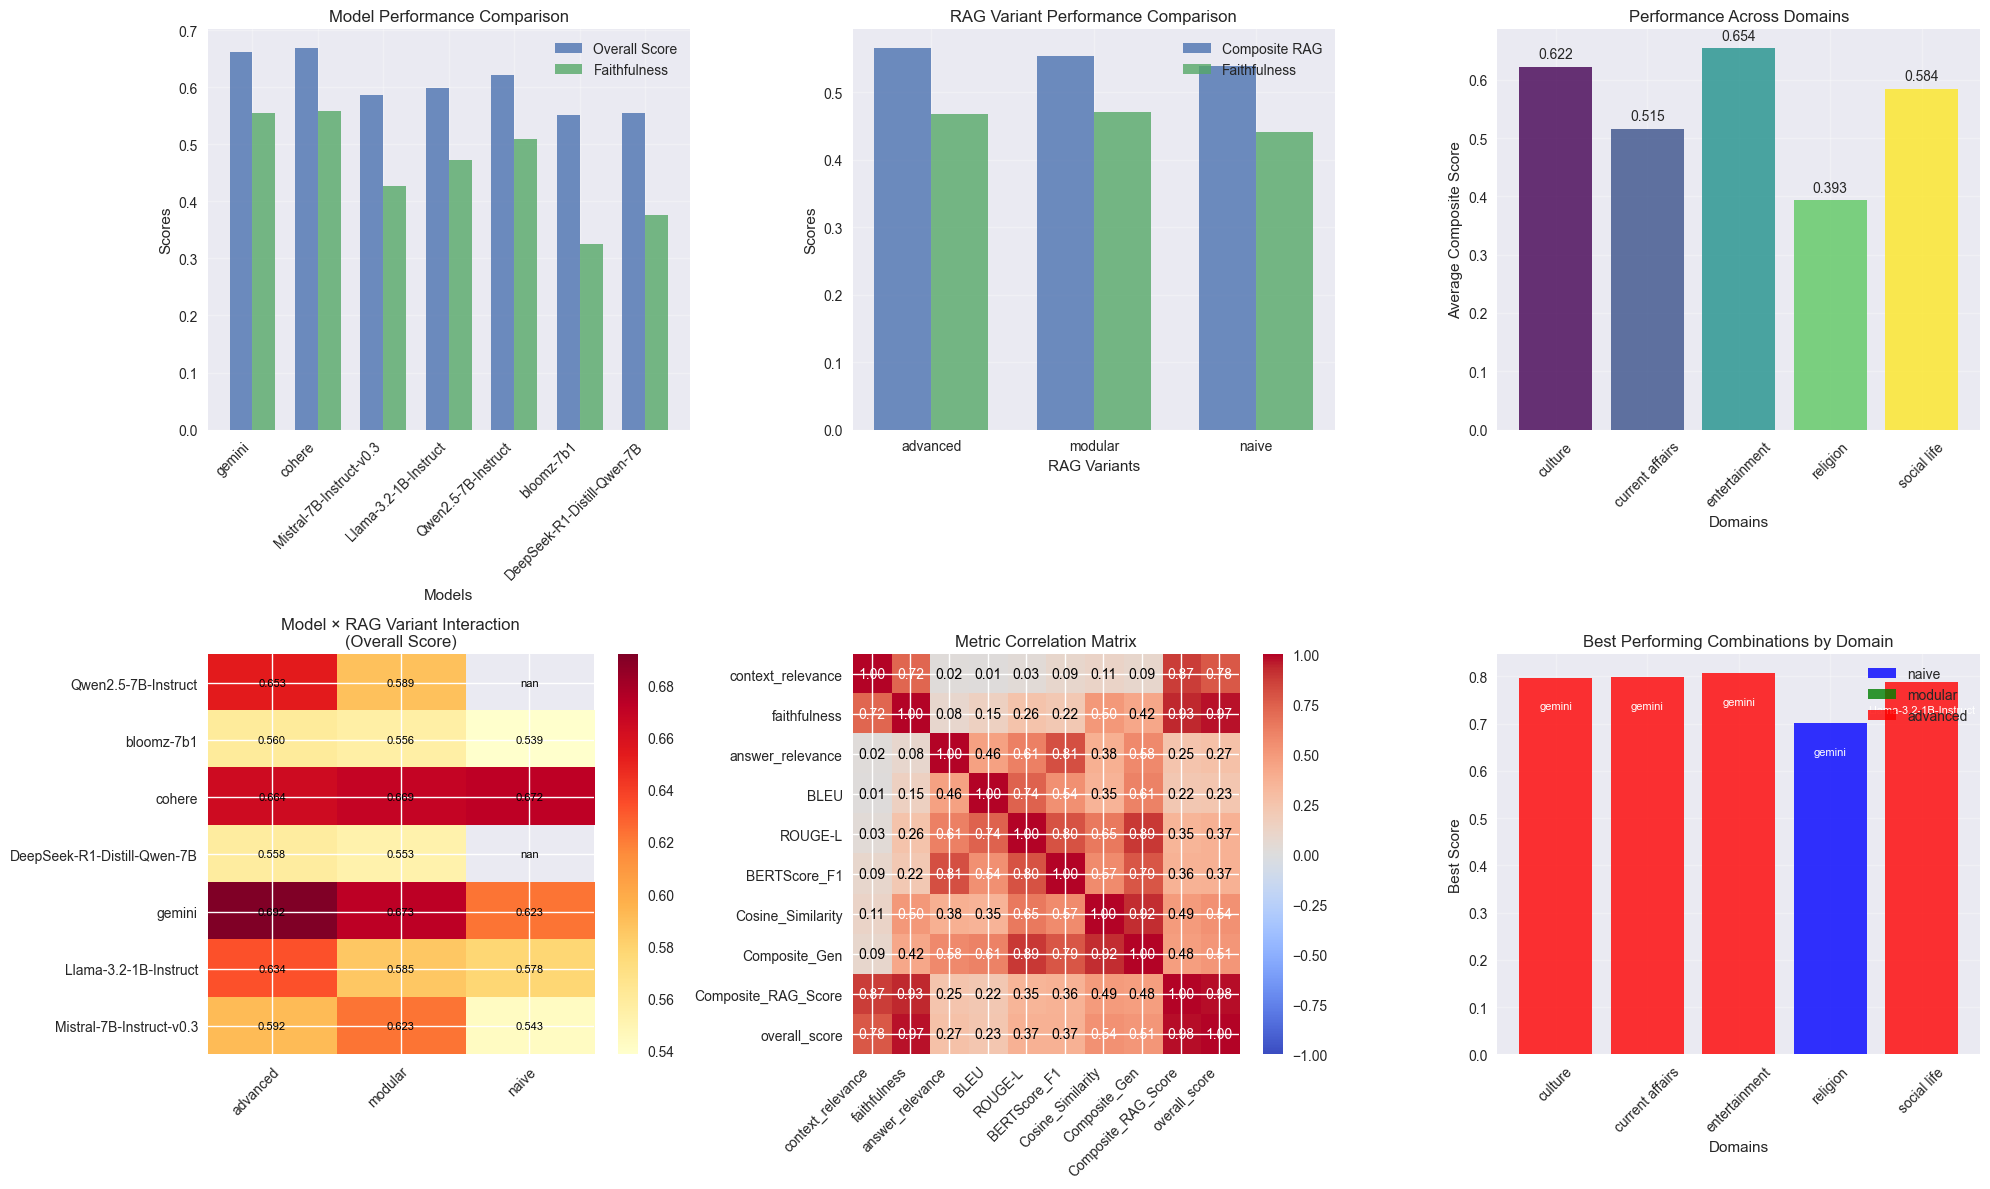

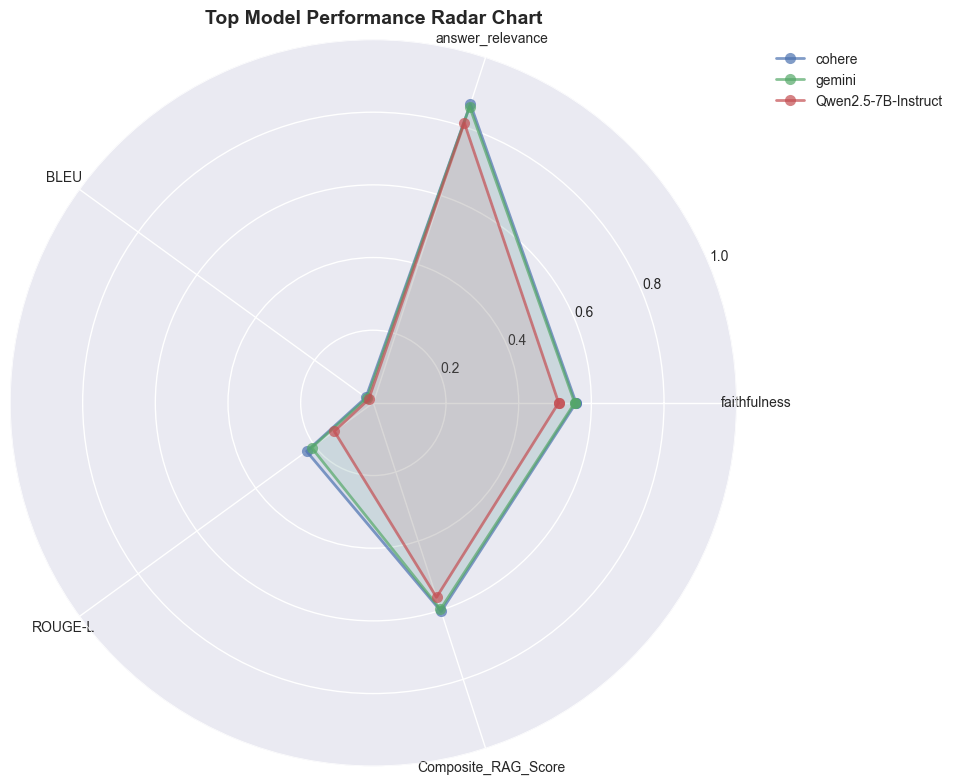

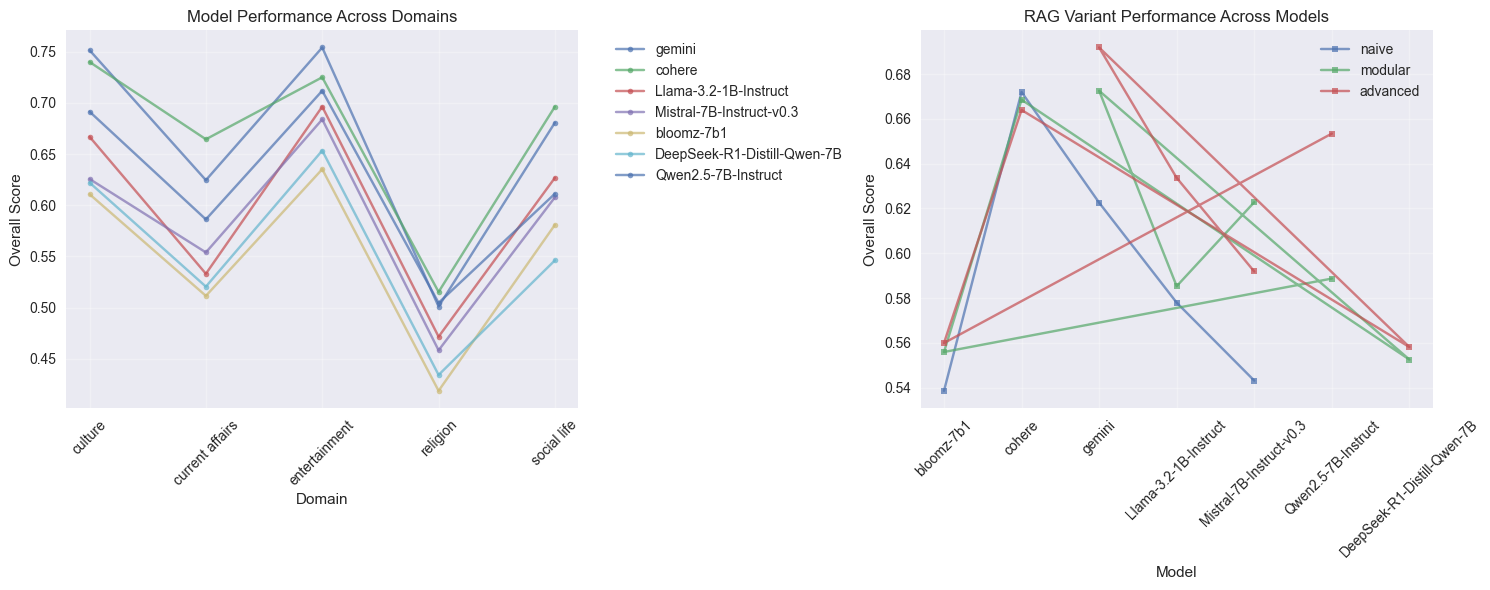

STATISTICAL SIGNIFICANCE ANALYSIS
ANOVA - RAG Variants: F=0.9735, p=0.3797
→ No significant differences between RAG variants

ANOVA - Models: F=4.7463, p=0.0002
→ Significant differences exist between models

ANOVA - Domains: F=36.9291, p=0.0000
→ Significant differences exist between domains
COMPREHENSIVE RAG EVALUATION REPORT - OBJECTIVE 3

🏆 BEST OVERALL COMBINATION:
   Model: gemini
   RAG Variant: advanced
   Domain: entertainment
   Overall Score: 0.8063
   Composite RAG Score: 0.7420

📊 TOP PERFORMING MODELS:
   1. cohere                         Score: 0.6682
   2. gemini                         Score: 0.6624
   3. Qwen2.5-7B-Instruct            Score: 0.6211
   4. Llama-3.2-1B-Instruct          Score: 0.5990
   5. Mistral-7B-Instruct-v0.3       Score: 0.5859

🔄 BEST RAG VARIANT: advanced (Score: 0.6218)

🎯 DOMAIN-SPECIFIC RECOMMENDATIONS:
   culture        : gemini                    + advanced (Score: 0.7971)
   current affairs: gemini                    + advanced (Score: 0.7

In [46]:
# Initialize and run the analysis
data_paths = {
    'naive': 'C:\\Users\\Lightified\\Desktop\\RAG\\Rag\\Obj 4\\Naive',
    'modular': 'C:\\Users\\Lightified\\Desktop\\RAG\\Rag\\Obj 4\\Modular', 
    'advanced': 'C:\\Users\\Lightified\\Desktop\\RAG\\Rag\\Obj 4\\Advanced'
}

# Create analyzer instance
analyzer = RAGPerformanceAnalyzer(data_paths)

# Load and combine all data
df = analyzer.load_and_combine_data()

# Run comprehensive analysis
results = analyzer.comprehensive_analysis()

# Create visualizations
analyzer.create_comprehensive_visualizations()

# Perform statistical analysis
analyzer.perform_statistical_analysis()

# Generate final report
analyzer.generate_final_report()

# Export results for further analysis
def export_analysis_results(analyzer, filename="rag_evaluation_results.xlsx"):
    """Export comprehensive results to Excel"""
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        # Raw data
        analyzer.df.to_excel(writer, sheet_name='Raw_Data', index=False)
        
        # Model performance
        model_df = pd.DataFrame(analyzer.results['by_model']['performance']).T
        model_df.to_excel(writer, sheet_name='Model_Performance')
        
        # Domain performance
        domain_df = pd.DataFrame(analyzer.results['by_domain']).T
        domain_df.to_excel(writer, sheet_name='Domain_Performance')
        
        # Best combinations
        best_combinations = []
        for domain, combo in analyzer.results['best_combinations']['by_domain'].items():
            combo['domain'] = domain
            best_combinations.append(combo)
        best_df = pd.DataFrame(best_combinations)
        best_df.to_excel(writer, sheet_name='Best_Combinations', index=False)
    
    print(f"Results exported to {filename}")

export_analysis_results(analyzer)